In [1]:
import pandas as pd
import networkx as nx
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_excel('E:\Проекты\ЭПВ-2018-02 Бахрушев-внутрянка\Щитки.xlsx',sheet_name='Таблица оборудования')

In [6]:
# Уникальные помещения и щитки
pd.DataFrame(data['Помещение/Назначение'].unique()).to_excel('Уникальные помещения.xlsx')

In [3]:
code_na = [f'N{x}' for x in range(sum(data['Код оборудования'].isna()))]

In [4]:
data.loc[data['Код оборудования'].isna(), 'Код оборудования'] = code_na

In [5]:
data['Pуст, кВт'] = data['Pуст, кВт'].fillna(0)

In [6]:
data.columns

Index(['Код щитка', 'id', 'Номер АВ', 'Марка АВ', 'Номинал АВ',
       'Код оборудования', 'Модель', 'Наименование', 'Помещение/Назначение',
       'Pуст, кВт', 'Число фаз', 'cos', 'Kи', 'Pр', 'Iр, А', 'Код кабеля',
       'Марка кабеля', 'Количество жил', 'Сечение фазного', 'Сечение нулевого',
       'Длина', 'Потери', 'Надпись кабеля 1', 'Надпись кабеля 2',
       'Коды щитков', 'Полная марка кабеля'],
      dtype='object')

In [7]:
G=nx.DiGraph()
for row in data.iterrows():
    code = row[1]['Код оборудования']
    attributes = {x: row[1][x] for x in data.columns[5:11]}
    G.add_nodes_from([(code, attributes)])
    G.add_edges_from([(row[1]['Код щитка'], code)])

In [8]:
G.nodes['Электроснабжение']['power']=0

In [9]:
def all_successors(node):
    successors[node] = []
    for x in G.successors(node):
        if list(G.successors(x)):
            all_successors(x)
            successors[node].extend(successors[x])
        else:
            successors[node].append(x)

In [10]:
successors = {}
for node in (x for x in G.nodes() if G.out_degree(x)!=0):
    all_successors(node)

In [11]:
successors

{'ШС-12-2 (ТП-3721)': ['N0',
  'УП01',
  'УП02',
  'УП03',
  'УП04',
  'СЛ01',
  'СЛ02',
  'СЛ03',
  'СЛ04',
  'ХЛМ04',
  'N1',
  'N2'],
 'ШС-12-1 (ТП-3721)': ['N3',
  'ВРК01',
  'СК01',
  'СК02',
  'ВЛЧ02',
  'ВХ09',
  'КТ03',
  'ОВР01',
  'ФА01',
  'N4',
  'N5',
  'N6',
  'N7',
  'N8',
  'ХЛМ03'],
 'ШС-12 (ТП-3721)': ['N9',
  'N3',
  'ВРК01',
  'СК01',
  'СК02',
  'ВЛЧ02',
  'ВХ09',
  'КТ03',
  'ОВР01',
  'ФА01',
  'N4',
  'N5',
  'N6',
  'N7',
  'N8',
  'ХЛМ03',
  'ХК18',
  'ХК19',
  'N0',
  'УП01',
  'УП02',
  'УП03',
  'УП04',
  'СЛ01',
  'СЛ02',
  'СЛ03',
  'СЛ04',
  'ХЛМ04',
  'N1',
  'N2'],
 'ШС-7-2 (ТП-3721)': ['N10',
  'ХК05',
  'ВХ05',
  'ХК04',
  'ВХ04',
  'МН01',
  'N11',
  'N12',
  'N13'],
 'ШС-7-1 (ТП-3721)': ['КР01', 'КР02', 'КР03', 'КР04'],
 'ШС-7 (ТП-3721)': ['КР01',
  'КР02',
  'КР03',
  'КР04',
  'N10',
  'ХК05',
  'ВХ05',
  'ХК04',
  'ВХ04',
  'МН01',
  'N11',
  'N12',
  'N13',
  'ХК06',
  'N14'],
 'ШС-3-1 (ТП-3721)': ['ХК28', 'ХК29', 'ХК20', 'ХК21', 'ВХ06', 'N15',

In [12]:
table = pd.DataFrame(columns=data.columns)
for source, eq in successors.items():
    t = data.merge(pd.DataFrame(eq,columns=['Код оборудования']))
    t['Код щитка'] = source
    table = table.append(t)

In [14]:
table.to_excel('Мощности_2.xlsx')

Обработка мощностей с удаленными воздухоохладителями

In [15]:
data_new = pd.read_excel('Мощности.xlsx')

In [16]:
data_new.head()

,Столбец1,Код щитка,id,Код оборудования,Модель,Наименование,Помещение/Назначение,"Pуст, кВт",Число фаз,cos
0,0,ШС-12-2 (ТП-3721),1,N0,NaN,NaN,NaN,0.0,3,NaN
1,1,ШС-12-2 (ТП-3721),2,УП01,Multivac R275,Упаковочная машина,Отделение сервировочной нарезки,18.5,3,0.8
2,2,ШС-12-2 (ТП-3721),3,УП02,Multivac R570,Упаковочная машина,Отделение сервировочной нарезки,15.0,3,0.8
3,3,ШС-12-2 (ТП-3721),4,УП03,Multivac R530,Упаковочная машина,Отделение сервировочной нарезки,15.5,3,0.8
4,4,ШС-12-2 (ТП-3721),5,УП04,Variovac Optimus,Упаковочная машина,Отделение сервировочной нарезки,14.0,3,0.8


In [17]:
data_new['S'] = data_new['Pуст, кВт'] / data_new['cos']

In [18]:
to_export = data_new.groupby('Код щитка').agg({'Pуст, кВт':sum,'S':sum})
to_export.head()

,"Pуст, кВт",S
Код щитка,,
ВРУ ввод 1 (ТП-2884),596.514,692.188194
ВРУ ввод 2 (ТП-2884),857.702,970.536806
ВРУ ввод 3 (ТП-2884),477.138,521.681396
ВРУ-0.4 (ТП-3721),1173.428,1281.855556
ДГУ-1,503.338,586.988779


In [19]:
to_export['cos'] = to_export['Pуст, кВт'] / to_export['S']

In [20]:
to_export.head()

,"Pуст, кВт",S,cos
Код щитка,,,
ВРУ ввод 1 (ТП-2884),596.514,692.188194,0.861780
ВРУ ввод 2 (ТП-2884),857.702,970.536806,0.883740
ВРУ ввод 3 (ТП-2884),477.138,521.681396,0.914616
ВРУ-0.4 (ТП-3721),1173.428,1281.855556,0.915414
ДГУ-1,503.338,586.988779,0.857492


In [22]:
to_export.to_excel('Суммарная мощность щитков.xlsx')

Суммарная мощность

In [23]:
power = {}
for node, successor in successors.items():
    power[node] = sum([G.nodes[x]['Pуст, кВт'] for x in successor])
    G.nodes[node]['Pуст, кВт'] = power[node]

In [24]:
colors = [G.nodes[x]['Pуст, кВт'] for x in G.nodes]

In [25]:
power

{'ШС-12-2 (ТП-3721)': 114.364,
 'ШС-12-1 (ТП-3721)': 69.456,
 'ШС-12 (ТП-3721)': 263.82000000000005,
 'ШС-7-2 (ТП-3721)': 89.608,
 'ШС-7-1 (ТП-3721)': 40.0,
 'ШС-7 (ТП-3721)': 148.608,
 'ШС-3-1 (ТП-3721)': 166.0,
 'ВРУ-0.4 (ТП-3721)': 1242.428,
 'ШС-12-2 (ТП-2884)': 56.456,
 'ШС-12-1 (ТП-2884)': 107.76,
 'ШС-12 (ТП-2884)': 229.838,
 'ШС-11 (ТП-2884)': 39.5,
 'ШС-11-1 (ТП-2884)': 18.0,
 'ВРУ ввод 3 (ТП-2884)': 555.938,
 'ШС-10 (ТП-2884)': 33.6,
 'ШС-10-1 (ТП-2884)': 13.8,
 'ШС-8-2 (ТП-2884)': 58.0,
 'ШС-8-1 (ТП-2884)': 50.4,
 'ШС-6-2 (ТП-2884)': 78.792,
 'ШС-6-1 (ТП-2884)': 43.76,
 'ШС-6-3 (ТП-2884)': 6.85,
 'ШС-6 (ТП-2884)': 157.90200000000002,
 'ВРУ ввод 2 (ТП-2884)': 857.702,
 'ШС-2-1 (ТП-2884)': 40.89,
 'ШС-2 (ТП-2884)': 101.59,
 'ШС-1-2Б (ТП-2884)': 60.708,
 'ШС-1-2 (ТП-2884)': 105.316,
 'ШС-1-2А (ТП-2884)': 63.315999999999995,
 'ШС-1-1А (ТП-2884)': 29.608,
 'ШС-1-1 (ТП-2884)': 56.608,
 'ВРУ ввод 1 (ТП-2884)': 644.514,
 'ШС-4-5 (ТП-445)': 16.466,
 'ШС-4-4 (ТП-445)': 22.5,
 'ШС-4-3 

C:\Users\Vadim\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


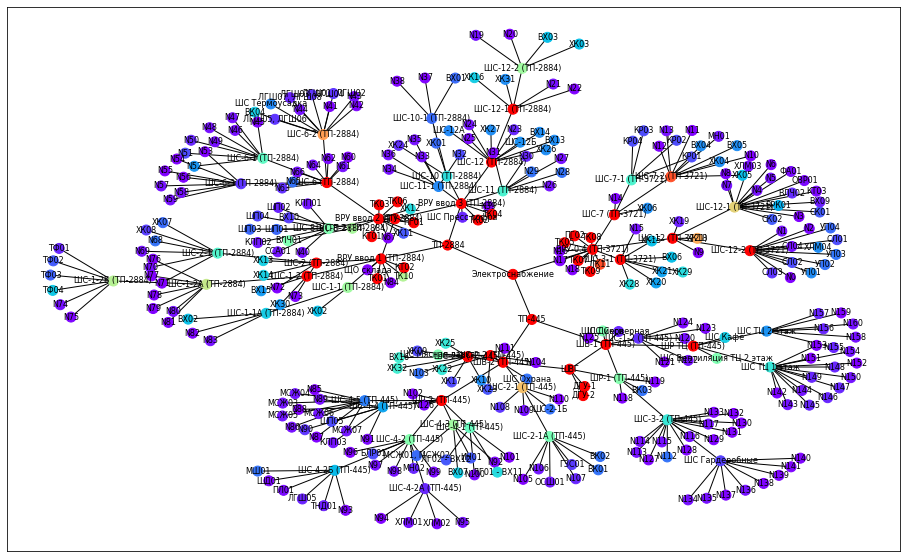

In [26]:
figure(figsize=(16,10))
cmap = cm.bwr(colors)
nx.draw_networkx(G.to_undirected(), node_size=100, font_size=8, 
                 pos=nx.kamada_kawai_layout(G.to_undirected()),
                  node_color=colors, cmap='rainbow',vmax=100)
savefig('Граф электроснабжения с потребителями', dpi=400, bbox_inches='tight')

### Только щитки

In [27]:
data = data_raw.iloc[:,[0,3]]

NameError: name 'data_raw' is not defined

In [28]:
boards = list(data['Код щитка'].unique())

In [29]:
cables_boards = data.dropna()
cables_boards = list((tuple(x) for x in cables_boards.values))

In [30]:
G=nx.Graph()
G.add_nodes_from(boards)
G.add_edges_from(cables_boards)

NetworkXError: Edge tuple ('ШС-12-2 (ТП-3721)', 2, 1.0, 'Acti9 iC60N C63 3P', 63.0, 'УП01', 'Multivac R275', 'Упаковочная машина', 'Отделение сервировочной нарезки', 18.5, 3, 0.8, 1.0, 18.5, 35.03787878787878, 'ШС-12-2/M01', 'ВВГнг(A)-LS', 5.0, 16.0, 16.0, 15.0, 0.28099856870251505, 'ШС-12-2/M01-18,5-35,0-15', '0,3-ВВГнг(A)-LS-5x16', 'ШС-12-2', 'ВВГнг(A)-LS-5x16') must be a 2-tuple or 3-tuple.

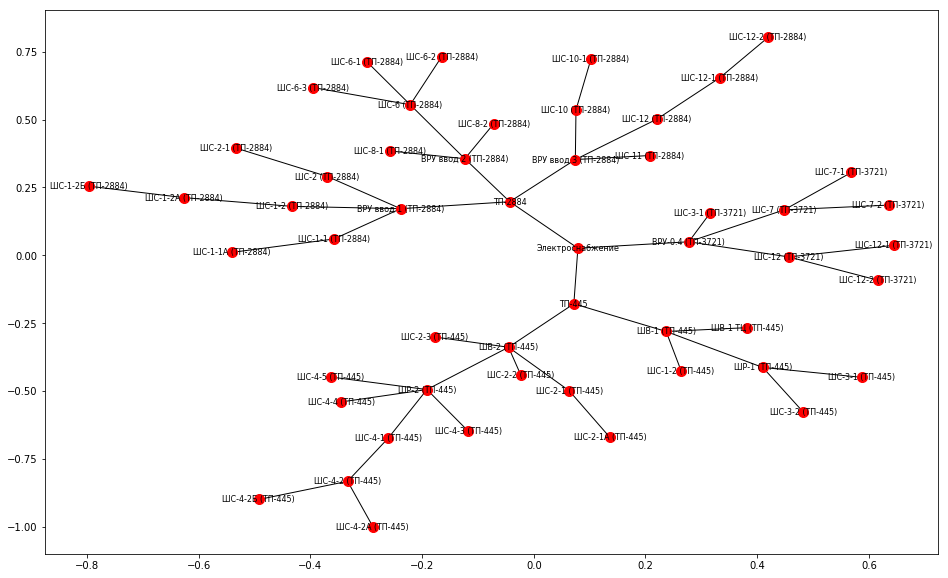

In [122]:
figure(figsize=(16,10))
nx.draw_networkx(G, node_size=100, font_size=8, pos=nx.kamada_kawai_layout(G))
savefig('Граф электроснабжения', dpi=400, bbox_inches='tight')

### Со всем оборудованием

In [123]:
data.loc[data['Код оборудования'].isna(),['Код оборудования']] = np.arange(222).reshape((222,1))
cables = list((tuple(x) for x in data.values))

C:\Users\Vadim\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Vadim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
G=nx.Graph()
G.add_nodes_from(boards)
G.add_edges_from(cables)

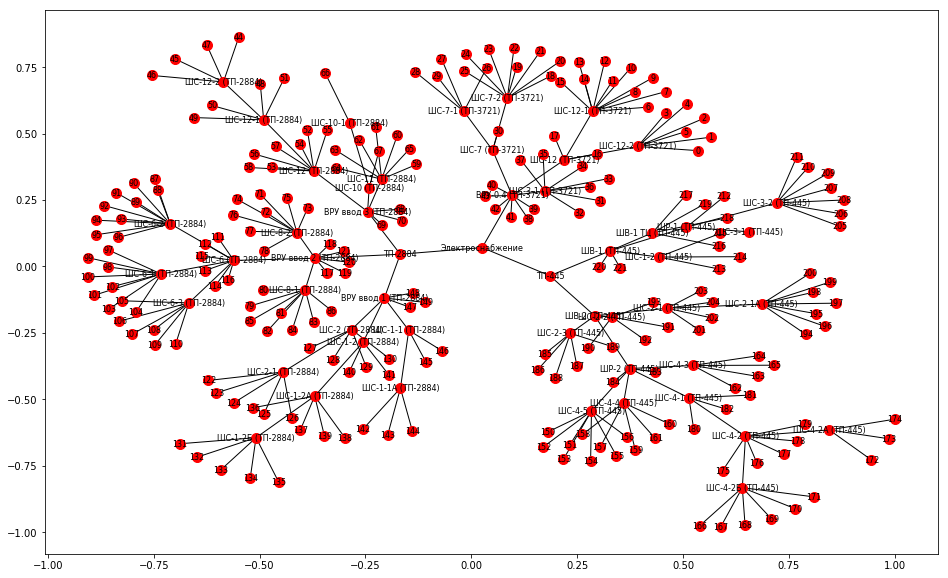

In [126]:
figure(figsize=(16,10))
nx.draw_networkx(G, node_size=100, font_size=8, pos=nx.kamada_kawai_layout(G))
savefig('Граф электроснабжения с потребителями', dpi=400, bbox_inches='tight')